In [1]:
#Import packages
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Download working dataframe
working_dataframe=pd.read_csv('final_dataframe.csv')

In [3]:
working_dataframe.head()

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22


In [4]:
#Drop Neighborhoud column as we will not need it 
model_data=working_dataframe.drop(['Neighborhood'], axis=1)

In [7]:
model_data

,Borough,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,Bronx,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0
1,Bronx,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0
2,Bronx,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0
3,Bronx,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0
4,Bronx,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
301,Manhattan,40.756658,-74.000111,61,Thai Restaurant,0,0,0,1,133,100,20
302,Queens,40.587338,-73.805530,33,Seafood Restaurant,0,0,1,2,80,0,1615
303,Queens,40.611322,-73.765968,0,Vietnamese Restaurant,0,0,0,0,19,0,1
304,Queens,40.756091,-73.945631,31,Spanish Restaurant,0,0,0,0,75,80,0


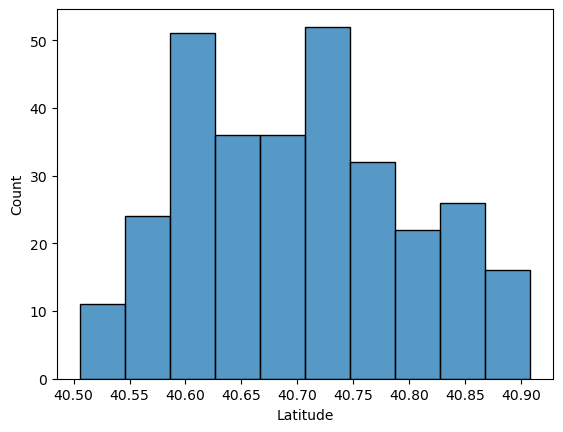

In [8]:
#Explore distributions of the features
sns.histplot(model_data["Latitude"])
plt.show()

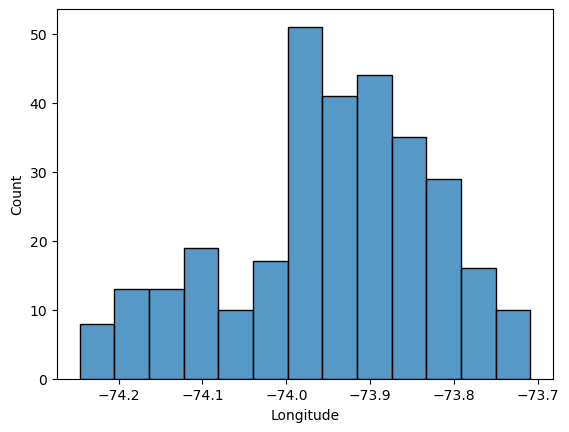

In [9]:
sns.histplot(model_data["Longitude"])
plt.show()

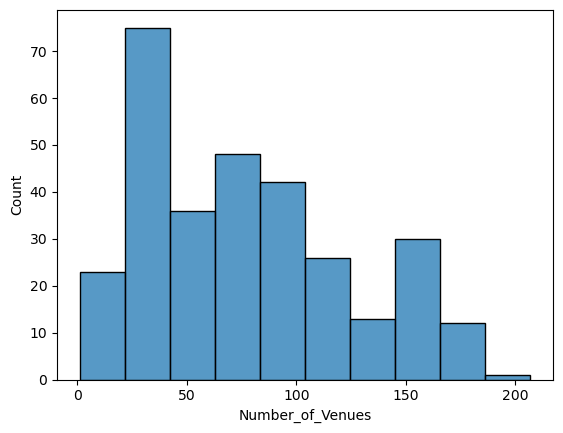

In [10]:
sns.histplot(model_data["Number_of_Venues"])
plt.show()

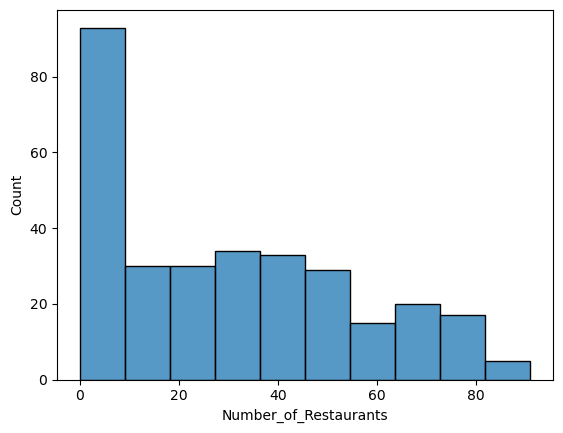

In [12]:
sns.histplot(model_data["Number_of_Restaurants"])
plt.show()

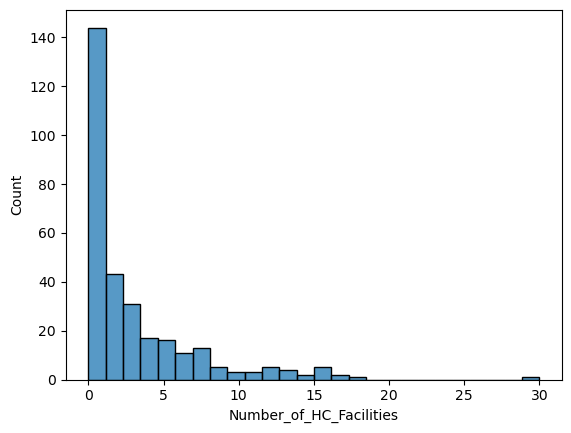

In [13]:
sns.histplot(model_data["Number_of_HC_Facilities"])
plt.show()

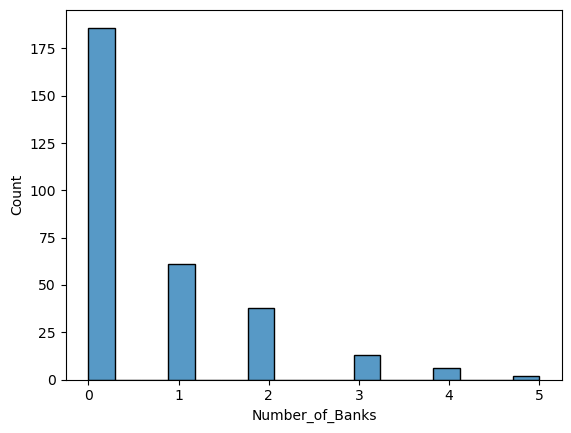

In [14]:
sns.histplot(model_data["Number_of_Banks"])
plt.show()

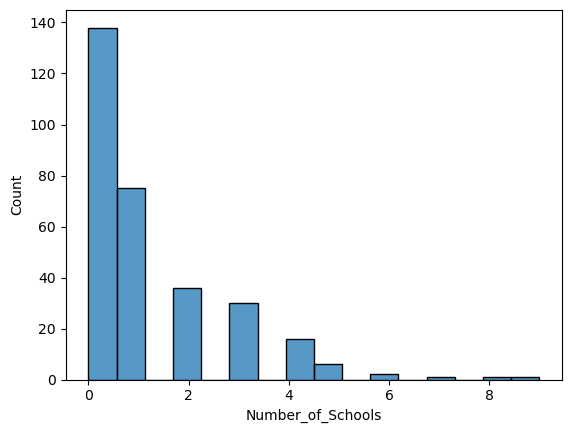

In [15]:
sns.histplot(model_data["Number_of_Schools"])
plt.show()

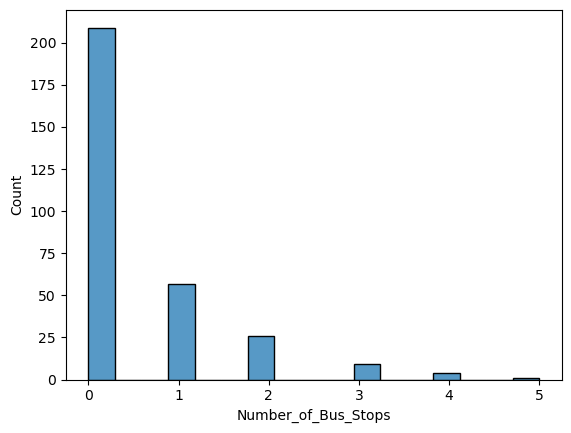

In [16]:
sns.histplot(model_data["Number_of_Bus_Stops"])
plt.show()

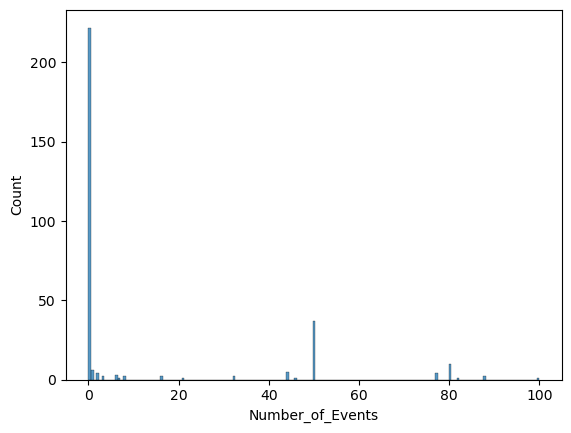

In [17]:
sns.histplot(model_data["Number_of_Events"])
plt.show()

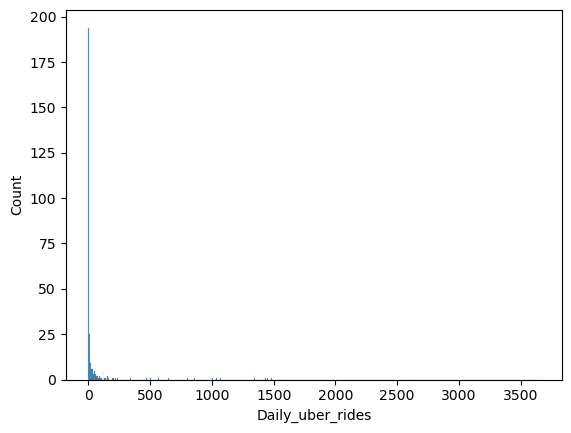

In [18]:
sns.histplot(model_data["Daily_uber_rides"])
plt.show()

In [20]:
#Encode categorical variables
import statsmodels.api as sm
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['Borough','Top_Restaurant_Category'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

model_data_encoded = encoder.fit_transform(model_data)
model_data_encoded

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Borough_Bronx,Borough_Manhattan,Borough_Brooklyn,Borough_Queens,Borough_Staten Island,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category_Sandwich Restaurant,Top_Restaurant_Category_Restaurant,...,Top_Restaurant_Category_Japanese Restaurant,Top_Restaurant_Category_Peruvian Restaurant,Top_Restaurant_Category_Asian Restaurant,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,1.0,0.0,0.0,0.0,0.0,40.894705,-73.847201,5,1.0,0.0,...,0.0,0.0,0.0,7,2,9,0,69,0,0
1,1.0,0.0,0.0,0.0,0.0,40.874294,-73.829939,4,0.0,1.0,...,0.0,0.0,0.0,4,0,3,2,35,0,0
2,1.0,0.0,0.0,0.0,0.0,40.887556,-73.827806,10,0.0,0.0,...,0.0,0.0,0.0,1,1,3,4,42,0,0
3,1.0,0.0,0.0,0.0,0.0,40.895437,-73.905643,3,0.0,0.0,...,0.0,0.0,0.0,4,0,4,1,32,0,0
4,1.0,0.0,0.0,0.0,0.0,40.890834,-73.912585,10,0.0,0.0,...,0.0,0.0,0.0,1,2,1,1,51,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.0,1.0,0.0,0.0,0.0,40.756658,-74.000111,61,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,133,100,20
302,0.0,0.0,0.0,1.0,0.0,40.587338,-73.805530,33,0.0,0.0,...,0.0,0.0,0.0,0,0,1,2,80,0,1615
303,0.0,0.0,0.0,1.0,0.0,40.611322,-73.765968,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,19,0,1
304,0.0,0.0,0.0,1.0,0.0,40.756091,-73.945631,31,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,75,80,0


In [21]:
#Extract numerical features
num_features = model_data_encoded.loc[:,['Number_of_Venues', 'Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools', 'Number_of_Bus_Stops', 'Number_of_Events', 'Daily_uber_rides']]

In [22]:
num_features.columns.tolist()

['Number_of_Venues',
 'Number_of_Restaurants',
 'Number_of_HC_Facilities',
 'Number_of_Banks',
 'Number_of_Schools',
 'Number_of_Bus_Stops',
 'Number_of_Events',
 'Daily_uber_rides']

In [23]:
#Scale numerical features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
num_features_scaled=scaler.fit_transform(num_features)

In [24]:
selected_columns = num_features.columns

In [25]:
df_num_features_scaled = pd.DataFrame(num_features_scaled, columns = selected_columns)

In [26]:
df_num_features_scaled

,Number_of_Venues,Number_of_Restaurants,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Events,Daily_uber_rides
0,-0.167994,-1.026110,0.939866,1.261459,5.082441,-0.567127,-0.504743,-0.272021
1,-0.892625,-1.066641,0.212994,-0.658971,1.173198,1.643585,-0.504743,-0.272021
2,-0.743436,-0.823458,-0.513878,0.301244,1.173198,3.854297,-0.504743,-0.272021
3,-0.956563,-1.107171,0.212994,-0.658971,1.824739,0.538229,-0.504743,-0.272021
4,-0.551622,-0.823458,-0.513878,1.261459,-0.129882,0.538229,-0.504743,-0.216335
...,...,...,...,...,...,...,...,...
301,1.196017,1.243598,-0.756168,-0.658971,-0.781423,0.538229,3.603003,-0.221397
302,0.066445,0.108744,-0.756168,-0.658971,-0.129882,1.643585,-0.504743,3.815863
303,-1.233627,-1.228763,-0.756168,-0.658971,-0.781423,-0.567127,-0.504743,-0.269490
304,-0.040118,0.027683,-0.756168,-0.658971,-0.781423,-0.567127,2.781454,-0.272021


In [27]:
#Add scaled data to back to dataframe
model_data_encoded['Number_of_Venues']=df_num_features_scaled['Number_of_Venues']
model_data_encoded['Number_of_Restaurants']=df_num_features_scaled['Number_of_Restaurants']
model_data_encoded['Number_of_HC_Facilities']=df_num_features_scaled['Number_of_HC_Facilities']
model_data_encoded['Number_of_Banks']=df_num_features_scaled['Number_of_Banks']
model_data_encoded['Number_of_Schools']=df_num_features_scaled['Number_of_Schools']
model_data_encoded['Number_of_Bus_Stops']=df_num_features_scaled['Number_of_Bus_Stops']
model_data_encoded['Daily_uber_rides']=df_num_features_scaled['Daily_uber_rides']

In [28]:
model_data_encoded

,Borough_Bronx,Borough_Manhattan,Borough_Brooklyn,Borough_Queens,Borough_Staten Island,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category_Sandwich Restaurant,Top_Restaurant_Category_Restaurant,...,Top_Restaurant_Category_Japanese Restaurant,Top_Restaurant_Category_Peruvian Restaurant,Top_Restaurant_Category_Asian Restaurant,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,1.0,0.0,0.0,0.0,0.0,40.894705,-73.847201,-1.026110,1.0,0.0,...,0.0,0.0,0.0,0.939866,1.261459,5.082441,-0.567127,-0.167994,0,-0.272021
1,1.0,0.0,0.0,0.0,0.0,40.874294,-73.829939,-1.066641,0.0,1.0,...,0.0,0.0,0.0,0.212994,-0.658971,1.173198,1.643585,-0.892625,0,-0.272021
2,1.0,0.0,0.0,0.0,0.0,40.887556,-73.827806,-0.823458,0.0,0.0,...,0.0,0.0,0.0,-0.513878,0.301244,1.173198,3.854297,-0.743436,0,-0.272021
3,1.0,0.0,0.0,0.0,0.0,40.895437,-73.905643,-1.107171,0.0,0.0,...,0.0,0.0,0.0,0.212994,-0.658971,1.824739,0.538229,-0.956563,0,-0.272021
4,1.0,0.0,0.0,0.0,0.0,40.890834,-73.912585,-0.823458,0.0,0.0,...,0.0,0.0,0.0,-0.513878,1.261459,-0.129882,0.538229,-0.551622,0,-0.216335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.0,1.0,0.0,0.0,0.0,40.756658,-74.000111,1.243598,0.0,0.0,...,0.0,0.0,0.0,-0.756168,-0.658971,-0.781423,0.538229,1.196017,100,-0.221397
302,0.0,0.0,0.0,1.0,0.0,40.587338,-73.805530,0.108744,0.0,0.0,...,0.0,0.0,0.0,-0.756168,-0.658971,-0.129882,1.643585,0.066445,0,3.815863
303,0.0,0.0,0.0,1.0,0.0,40.611322,-73.765968,-1.228763,0.0,0.0,...,0.0,0.0,0.0,-0.756168,-0.658971,-0.781423,-0.567127,-1.233627,0,-0.269490
304,0.0,0.0,0.0,1.0,0.0,40.756091,-73.945631,0.027683,0.0,0.0,...,0.0,0.0,0.0,-0.756168,-0.658971,-0.781423,-0.567127,-0.040118,80,-0.272021


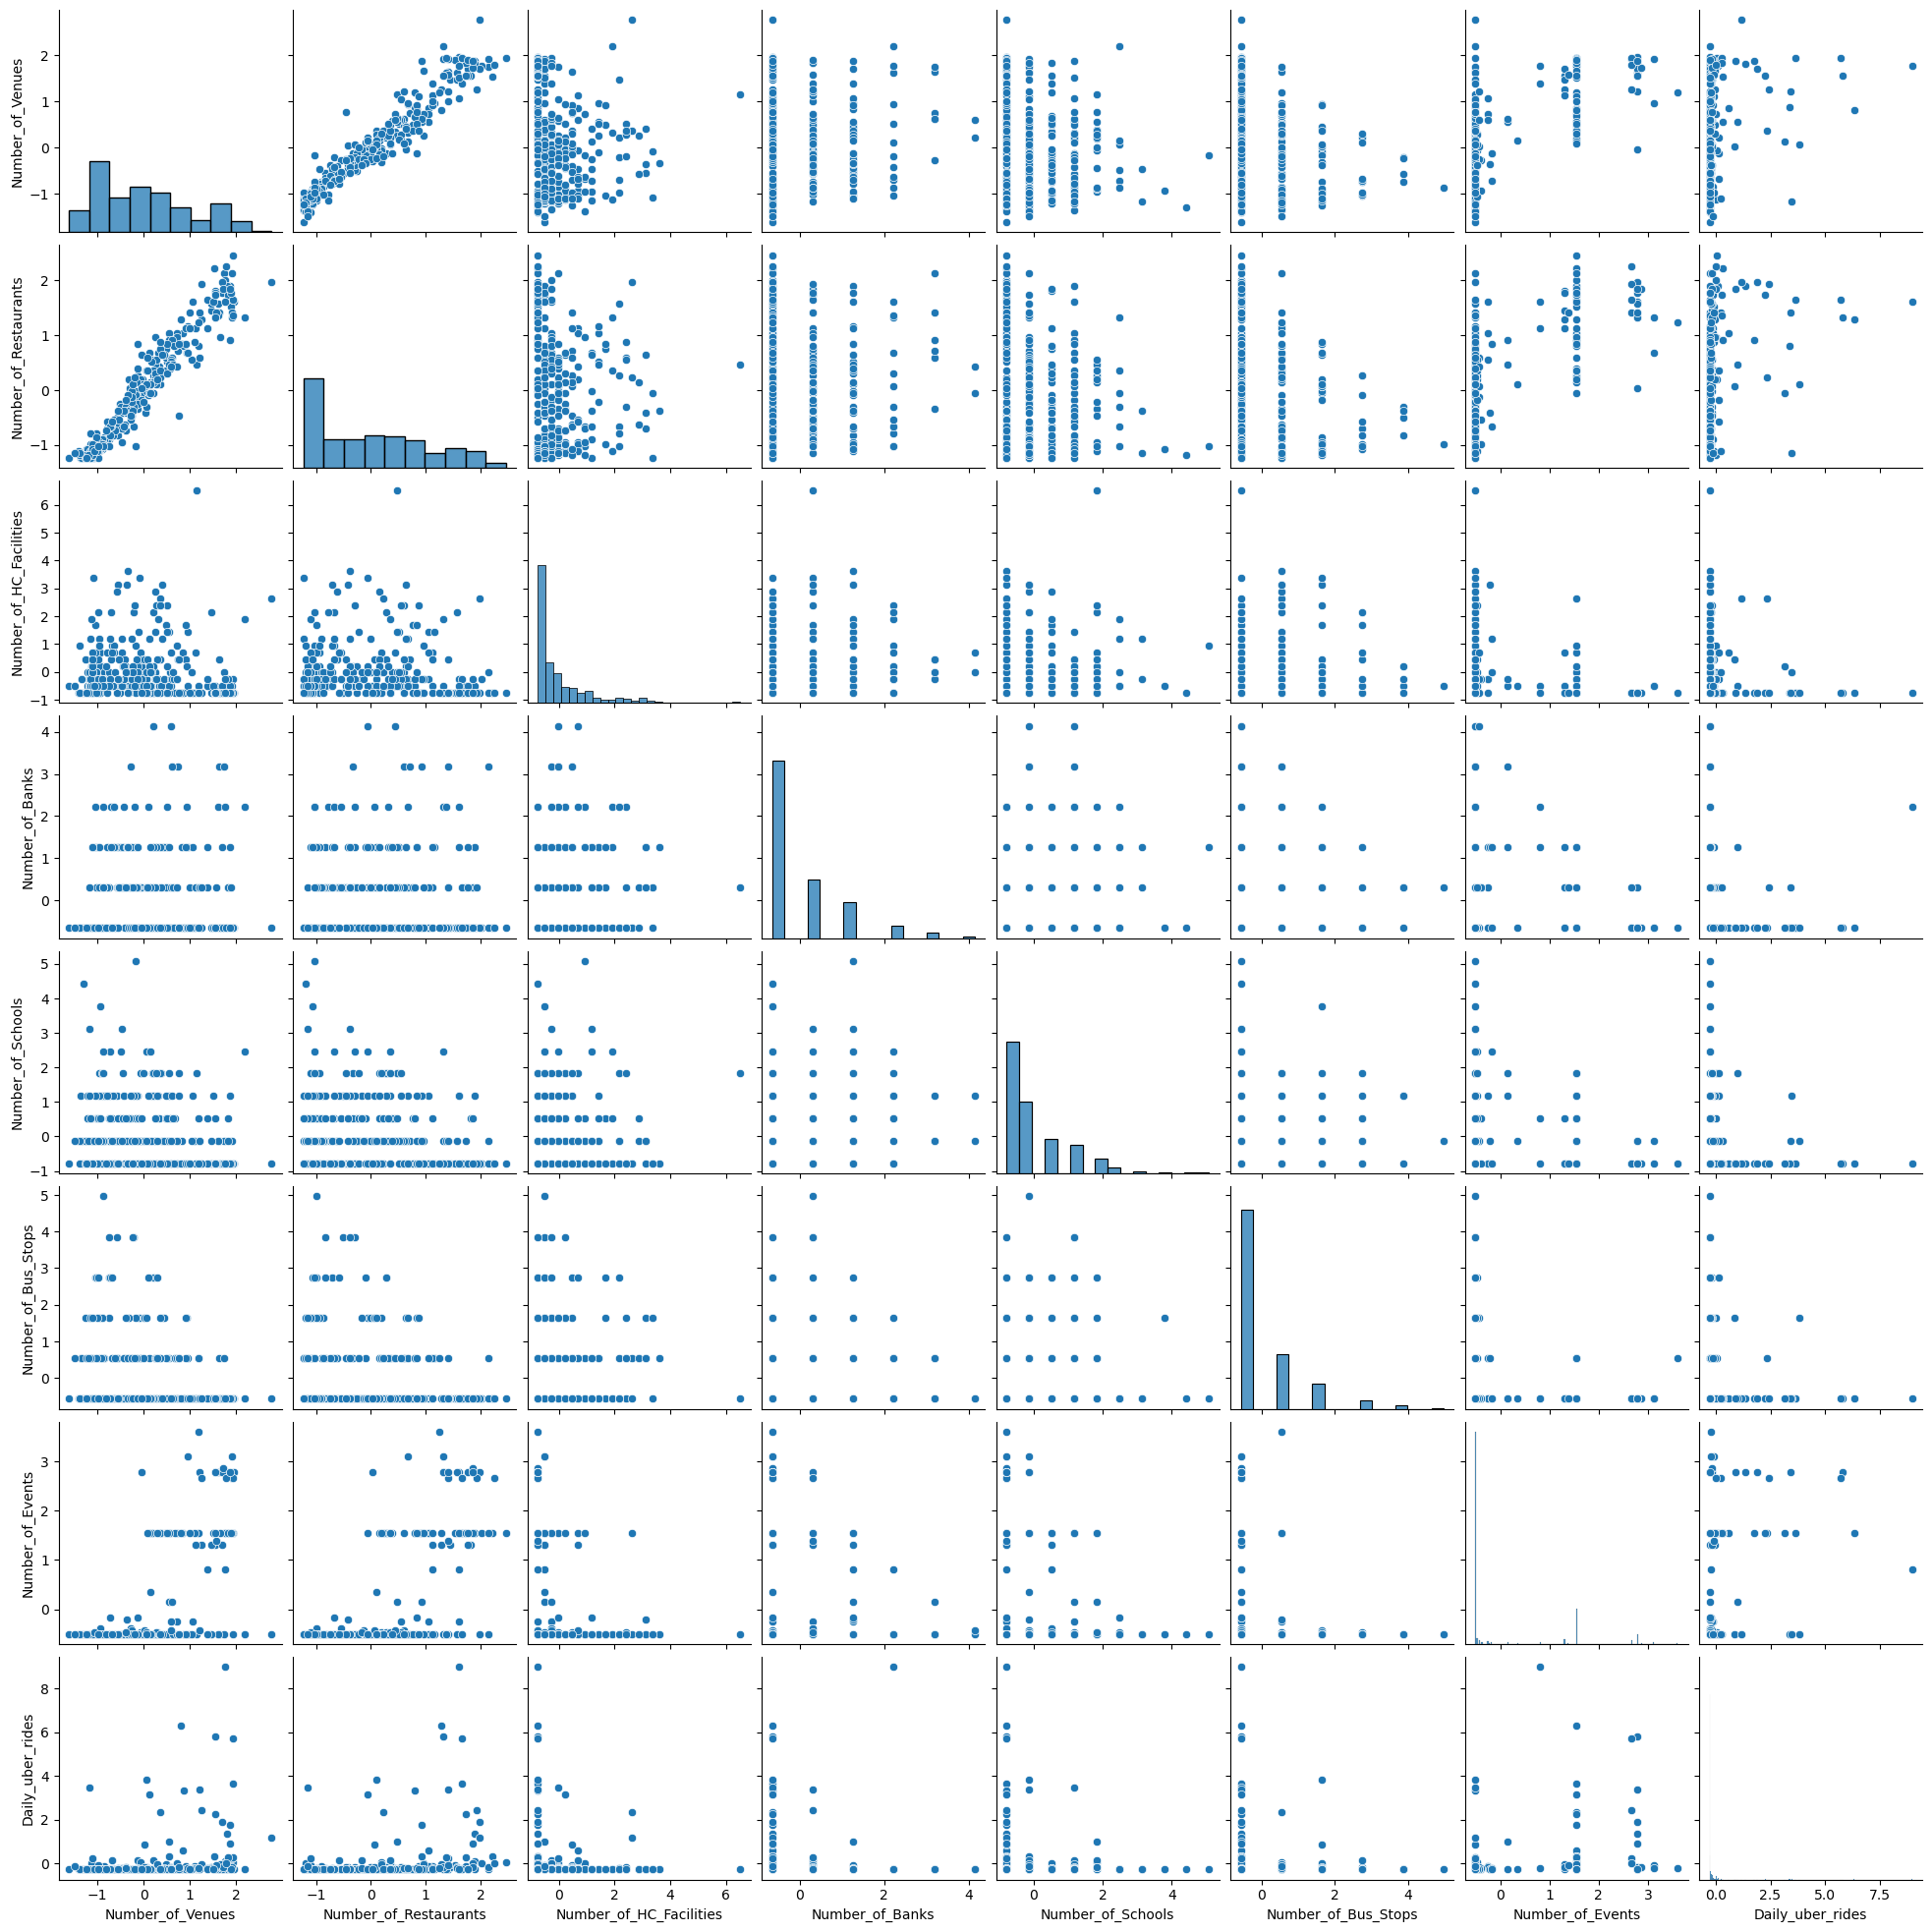

In [29]:
#Explore correlations
sns.pairplot(df_num_features_scaled)
plt.show()

In [30]:
df_num_features_scaled.corr()

,Number_of_Venues,Number_of_Restaurants,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Events,Daily_uber_rides
Number_of_Venues,1.000000,0.965112,-0.047583,0.116683,-0.124876,-0.214989,0.662595,0.297136
Number_of_Restaurants,0.965112,1.000000,-0.073739,0.103073,-0.157523,-0.217527,0.653943,0.287692
Number_of_HC_Facilities,-0.047583,-0.073739,1.000000,0.188256,0.051395,0.091037,-0.278891,-0.112783
Number_of_Banks,0.116683,0.103073,0.188256,1.000000,0.118862,-0.051144,-0.183345,-0.050628
Number_of_Schools,-0.124876,-0.157523,0.051395,0.118862,1.000000,0.065199,-0.203661,-0.135419
Number_of_Bus_Stops,-0.214989,-0.217527,0.091037,-0.051144,0.065199,1.000000,-0.230758,-0.090349
Number_of_Events,0.662595,0.653943,-0.278891,-0.183345,-0.203661,-0.230758,1.000000,0.353893
Daily_uber_rides,0.297136,0.287692,-0.112783,-0.050628,-0.135419,-0.090349,0.353893,1.000000


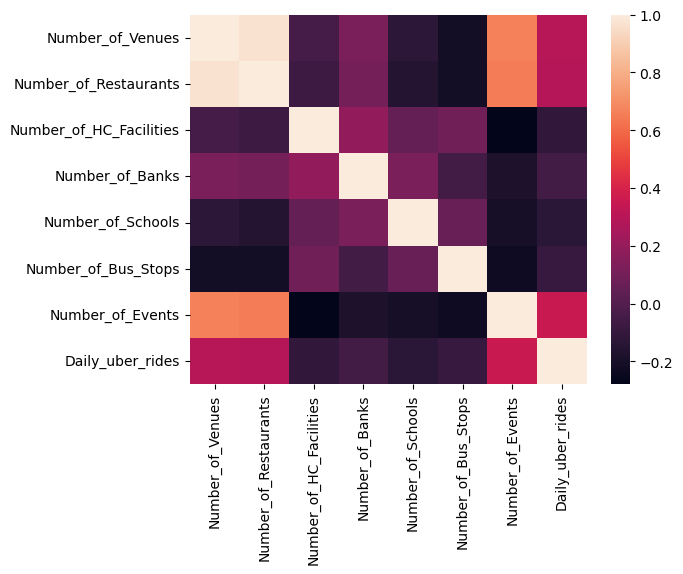

In [31]:
sns.heatmap(df_num_features_scaled.corr())
plt.show()

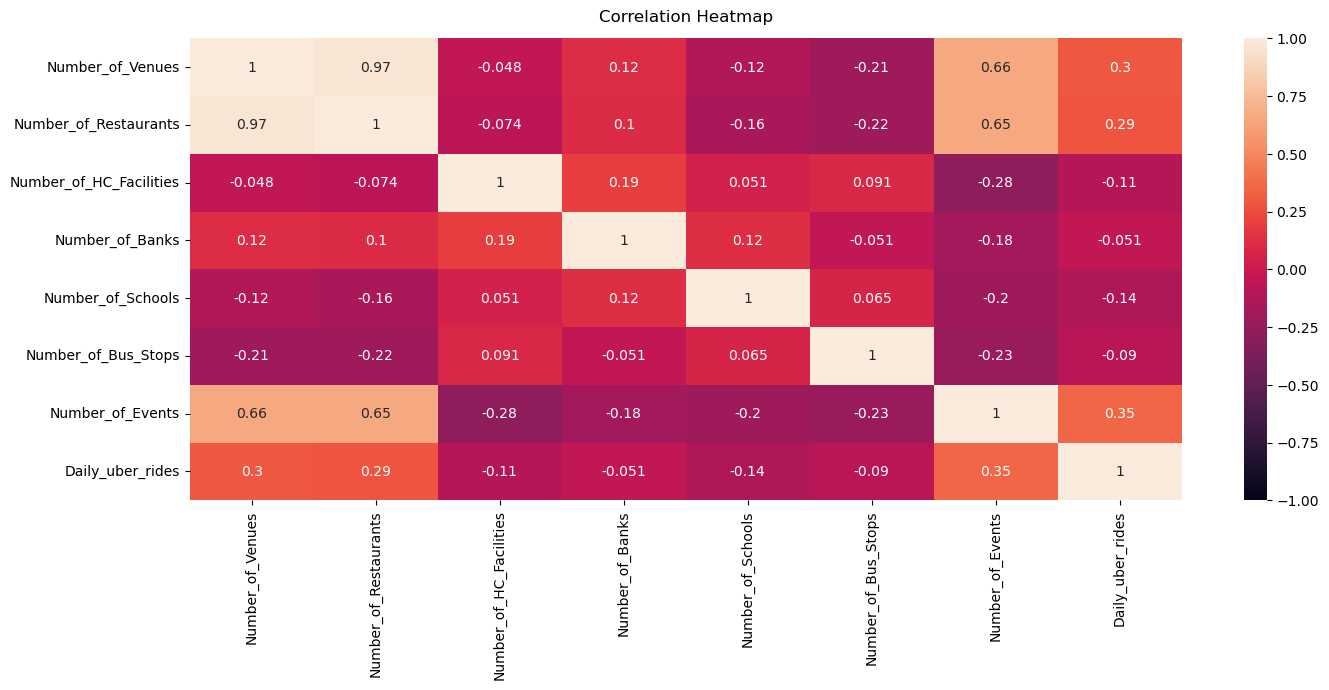

In [32]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_num_features_scaled.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

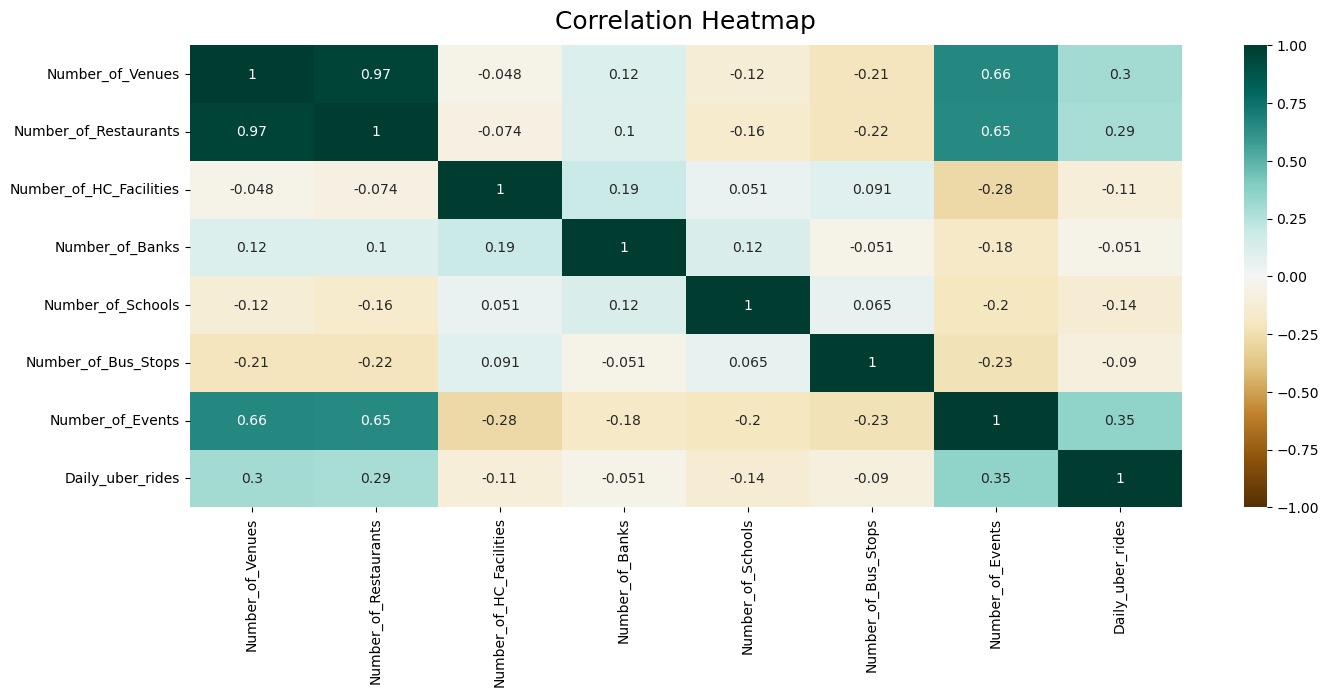

In [33]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_num_features_scaled.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
#As result of correlation analysis drop the number of restaurants
model_data_encoded=model_data_encoded.drop(['Number_of_Restaurants'], axis=1)

In [35]:
#Implement Elbow Rule to define the number of clusters
def plot_distortion(model_data_encoded,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(model_data_encoded)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


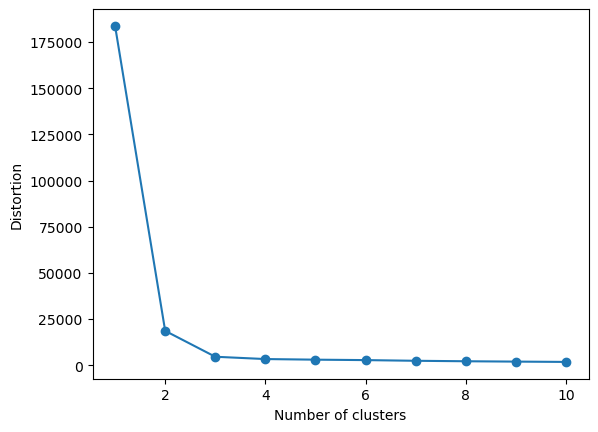

In [36]:
plot_distortion(model_data_encoded,max_clusters=10)

In [37]:
#Kmeans Clustering with defined number of Clusters
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [38]:
y_km = km.fit_predict(model_data_encoded)

In [39]:
model_data_encoded.values

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.67993975e-01,  0.00000000e+00, -2.72021019e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.92624704e-01,  0.00000000e+00, -2.72021019e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.43436025e-01,  0.00000000e+00, -2.72021019e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.23362740e+00,  0.00000000e+00, -2.69489822e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.01179642e-02,  8.00000000e+01, -2.72021019e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.48937942e+00,  0.00000000e+00, -1.37867548e-01]])

In [ ]:
#Function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
#Plot clusters with y_km 
plot_clusters(model_data_encoded.values, y_km, plt_cluster_centers= True)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = model_data_encoded
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = km.labels_
metrics.silhouette_score(model_data_encoded, labels, metric='euclidean')

In [ ]:
#Let us visualize clusters
#PCA -set up
from sklearn.decomposition import PCA

X = model_data_encoded

pca_nbhoods = PCA(n_components=2)
components = pca_nbhoods.fit_transform(X)
#fig = px.scatter(components, x=0, y=1, color=y)
#fig.show()

In [ ]:
#PCA - define the number of components
plt.bar(range(1,len(pca_nbhoods.explained_variance_ratio_)+1),pca_nbhoods.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_nbhoods.explained_variance_ratio_ )+1),
         np.cumsum(pca_nbhoods.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Visualize PCA with 2 components
n_components = 2

pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=y_km,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# 2D Scatter Plot
X = model_data_encoded

pca_nbhoods = PCA(n_components=2)
components = pca_nbhoods.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

In [ ]:
#3D Scatter Plot

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_km,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
#Hirachical clustering

In [ ]:
#Explore the Dendrogram
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [ ]:
plot_dendrogram(model_data_encoded)

In [ ]:
# create an object for Hier.Clust
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [ ]:
y_hc = ac.fit_predict(model_data_encoded)
y_hc

In [ ]:
plot_clusters(model_data_encoded.values,y_hc)

In [ ]:
metrics.silhouette_score(model_data_encoded, y_hc, metric='euclidean')

In [ ]:
#Initialize the class object
hierarch = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
 
#predict the labels of clusters.
label_hierarch = hierarch.fit_predict(df)
 
print(label_hierarch)

In [ ]:
metrics.silhouette_score(model_data_encoded, label_hierarch, metric='euclidean')

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label_hierarch)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#DBScan

In [ ]:
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [ ]:
y_db = db.fit_predict(X)

In [ ]:
db.labels_

In [ ]:
labels = db.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

In [ ]:
X.shape

In [ ]:
plot_clusters(X.values,y_db)

In [ ]:
#DBSCAN after PCA
dbscan = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')
 
#predict the labels of clusters.
label_db = dbscan.fit_predict(df)
 
print(label_db)

In [ ]:
metrics.silhouette_score(model_data_encoded, label_db, metric='euclidean')

In [ ]:
u_labels = np.unique(label_db)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#Get Clusters for each observation by Kmeans clustering
cluster_map = pd.DataFrame()
cluster_map['data_index'] = model_data_encoded.index.values
cluster_map['cluster'] = km.labels_

cluster_map#[cluster_map.cluster == 2]

In [ ]:
num_features['Cluster']=cluster_map['cluster']

In [ ]:
working_dataframe['Cluster']=cluster_map['cluster']

In [ ]:
working_dataframe.to_csv('NYC_clusters_ALL_NoRest_2.csv', index=False)

In [ ]:
#This is the DataFrame for discriptive cluster analysis
num_features

In [ ]:
df_cluster_0=num_features.loc[num_features.Cluster==0]

In [ ]:
df_cluster_0.describe() 

In [ ]:
df_cluster_1=num_features.loc[num_features.Cluster==1]
df_cluster_1.describe()

In [ ]:
#Normalize cluster subframes with min-max scaler
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_cluster_0 = scaler.fit_transform(df_cluster_0)
scaled_cluster_1 = scaler.fit_transform(df_cluster_1)


                                     

In [ ]:
#Return into DataFrame with column names
selected_columns0 = df_cluster_0.columns
df_scaled_cluster_0 = pd.DataFrame(scaled_cluster_0, columns = selected_columns0)
df_scaled_cluster_1 = pd.DataFrame(scaled_cluster_1, columns = selected_columns0)



In [ ]:
df_cluster_0_mean=df_scaled_cluster_0.mean()
radar0=df_cluster_0_mean.to_dict()
radar0_list=list(radar0.values())
radar0_list

In [ ]:
df_cluster_1_mean=df_scaled_cluster_1.mean()
radar1=df_cluster_1_mean.to_dict()
radar1_list=list(radar1.values())
radar1_list

In [ ]:
#Radar plot the clusters
import plotly.graph_objects as go

categories = ['Number_of_Venues', 'Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar0_list,
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=radar1_list,
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,1]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster comparison')
)

fig.show()

In [ ]:
categories = ['Number_of_Venues', 'Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events','Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar0_list,
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 0'))

In [ ]:
categories = ['Number_of_Venues', 'Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar1_list,
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 1'))